In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt

# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
folder = '/content/drive/MyDrive/CIS 530 project/'

In [ ]:
import sys
sys.path.append(folder)

In [ ]:

major_class_train_data = pd.read_csv(folder+"implicit_hate_train.csv")
major_class_dev_data = pd.read_csv(folder+"implicit_hate_dev.csv")
major_class_test_data = pd.read_csv(folder+"implicit_hate_test.csv")
print("major_class relevant keys: `post`, `class`")
print("  post: the tweet (str)")
print("  class: takes the values `explicit_hate`, `implicit_hate`, or `not_hate` (str)")

major_class relevant keys: `post`, `class`
  post: the tweet (str)
  class: takes the values `explicit_hate`, `implicit_hate`, or `not_hate` (str)


In [ ]:
minor_class_train_data = major_class_train_data[major_class_train_data['implicit_class'].notnull()].reset_index(drop=True)
minor_class_dev_data = major_class_dev_data[major_class_dev_data['implicit_class'].notnull()].reset_index(drop=True)
minor_class_test_data = major_class_test_data[major_class_test_data['implicit_class'].notnull()].reset_index(drop=True)

print("minor_class relevant keys: `post`, `implicit_class`")
print("  post: the tweet (str)")
print("  implicit_class: takes the values `incitement`, `inferiority`, `irony`, `stereotypical`, `threatening`, or `white_grievance` (str)")

minor_class relevant keys: `post`, `implicit_class`
  post: the tweet (str)
  implicit_class: takes the values `incitement`, `inferiority`, `irony`, `stereotypical`, `threatening`, or `white_grievance` (str)


In [ ]:
three_class_df = pd.concat([major_class_train_data,major_class_dev_data,major_class_test_data])
six_class_df = pd.concat([minor_class_train_data,minor_class_dev_data,minor_class_test_data])

In [ ]:
list(dict(six_class_df['class'].value_counts()).keys())

['implicit_hate', 'explicit_hate', 'not_hate']

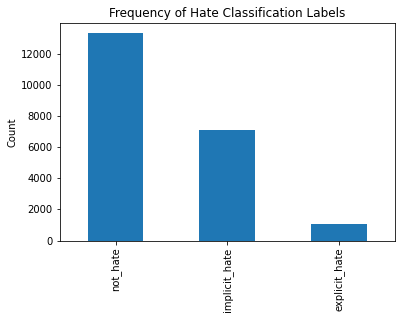

In [ ]:
three_class_df['class'].value_counts().plot(kind='bar',title='Frequency of Hate Classification Labels',ylabel='Count')

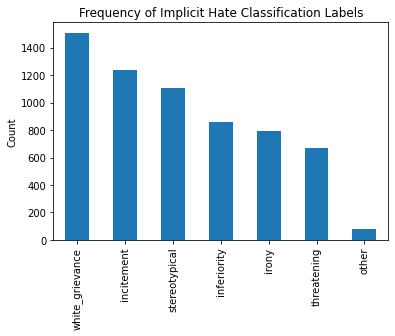

In [ ]:
six_class_df['implicit_class'].value_counts().plot(kind='bar',title='Frequency of Implicit Hate Classification Labels',ylabel='Count')

number of samples, what the data looks like, maybe anything else. take most common words out of wordclouds. lots of the analysis goes after the experiments too so don't worry too much. once you have the result, try and explain why

error analysis: similar to the homework, analyze our best model.

presentation recording length: 7m

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
def generate_wordcloud(df,is_3class,category):
  if is_3class:
    label = 'class'
  else:
    label = 'implicit_class'
  filtered_df = df[df[label]==category]
  lowercase_posts = df['post'].apply(lambda x : [y.lower() for y in x.split()])
  all_words = " ".join([i for l in list(lowercase_posts) for i in l ])
  wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10).generate(all_words)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title('Wordcloud for '+category+' posts')
  plt.show()

In [ ]:
def show_wordcloud(wordcloud,title):
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title)
  plt.show()

In [ ]:
three_class_df[three_class_df['class']=='not_hate']

,Unnamed: 0,post,class,implicit_class
3462,11896,white lives matter,not_hate,white_grievance
5804,15051,do you guys have a clan on call of duty ?,not_hate,NaN
5805,10996,white people who aren't yjcs .,not_hate,NaN
5806,17182,shut your police station down . all you do is ...,not_hate,NaN
5807,11264,americas poorest white town proves link betwee...,not_hate,NaN
...,...,...,...,...
2053,12111,1850 white vs slave ... white live longer ... ...,not_hate,NaN
2054,4180,is a open white nationalists website sir ...,not_hate,NaN
2055,14950,another way wall street big business democrats...,not_hate,NaN
2056,9474,because bannon thinks u r only american if u r...,not_hate,NaN


In [ ]:
three_class_df[three_class_df['class']=='explicit_hate']['implicit_class']

1669     incitement
3943    inferiority
4935            NaN
4936            NaN
4937            NaN
           ...     
723             NaN
724             NaN
725             NaN
726             NaN
727             NaN
Name: implicit_class, Length: 1089, dtype: object

Wordclouds for different classes (not hate vs implicit vs explicit) and implicit classes (inferiority vs grievance vs ...) all came out pretty much the same

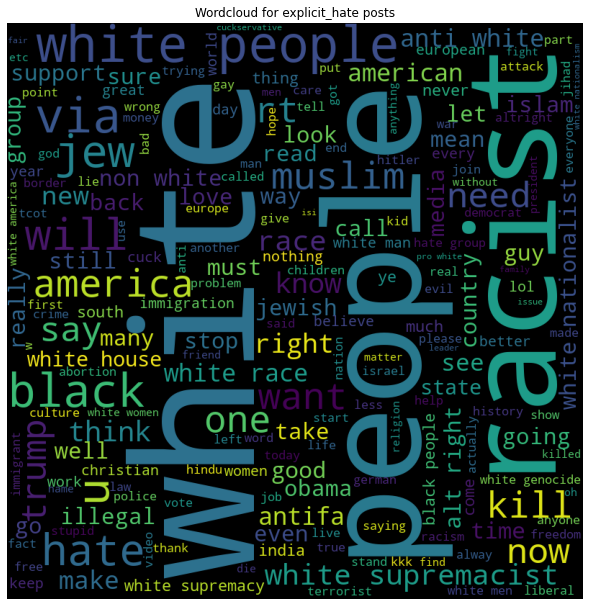

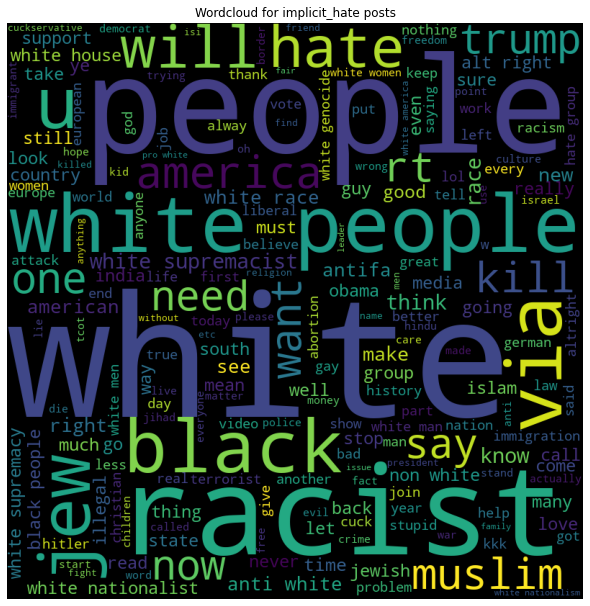

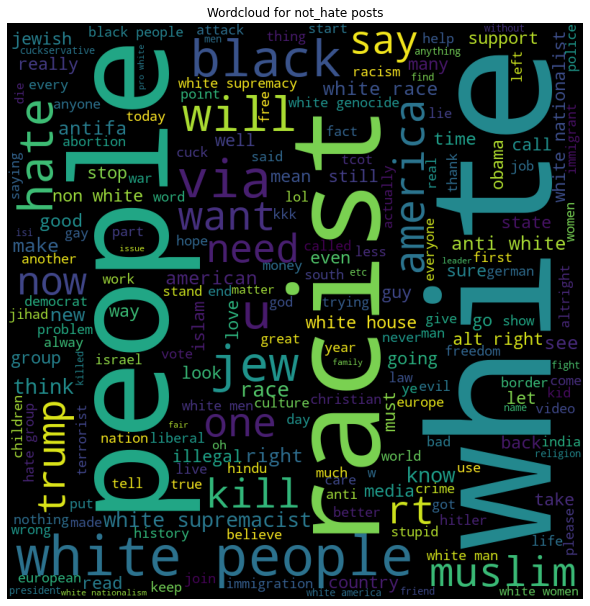

In [ ]:
# for category in set(three_class_df['class'].values):
  generate_wordcloud(three_class_df,True,category)

In [ ]:
for category in set(six_class_df['implicit_class'].values):
  generate_wordcloud(six_class_df,False,category)

Output hidden; open in https://colab.research.google.com to view.